In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import scipy.stats as stats

from scipy.optimize import curve_fit



time = np.arange(0,20, 2)
obs = np.array([30, 15, 11, 9, 3, 1, 2, 1, 2, 1])


# Finding the uncertainties for obs
uncertainties = np.sqrt(obs)


In [3]:
# # Making histogram with binwidth of 2
# bins = np.arange(0,20,2)
# plt.hist(obs, bins=bins, edgecolor='black')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Histogram of Data')
# plt.show()


In [4]:
# Making exponential fit functions
def normalized_exp(time, p1, p2):
    return p1 * (1 - np.exp(-2 * p2)) * np.exp(-p2 * time)




def exponential(time, p1, p2):
    return p1 * np.exp(-p2 * time)

C:\Users\barit\AppData\Local\Temp\ipykernel_10512\3882824738.py:3: RuntimeWarning: overflow encountered in exp
  return p1 * (1 - np.exp(-2 * p2)) * np.exp(-p2 * time)
C:\Users\barit\AppData\Local\Temp\ipykernel_10512\3882824738.py:3: RuntimeWarning: overflow encountered in multiply
  return p1 * (1 - np.exp(-2 * p2)) * np.exp(-p2 * time)


[70.52522924  0.26186792]
[[ 7.09740750e+01 -9.57116081e-03]
 [-9.57116081e-03  1.26919916e-03]]


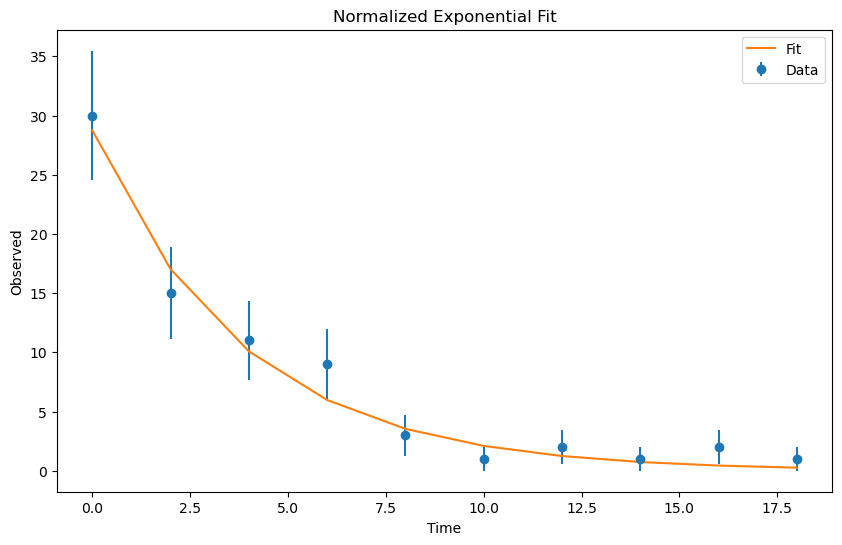

In [13]:
# Finding the best fit parameters for the normalized
popt, pcov = curve_fit(normalized_exp, time, obs, sigma=uncertainties, absolute_sigma=True)
print(popt)
print(pcov)
perr = np.sqrt(np.diag(pcov))

# Plotting the fit
plt.figure(figsize=(10,6))
plt.errorbar(time, obs, yerr=uncertainties, fmt='o', label='Data')
plt.plot(time, normalized_exp(time, *popt), label='Fit')
plt.xlabel('Time')
plt.ylabel('Observed')
plt.title('Normalized Exponential Fit')
plt.legend()
plt.show()



In [22]:
# Find relative uncertainty for covariance matrix
relative_uncertainty = np.sqrt(np.diag(pcov)) / popt

array([0.11945528, 0.136045  ])

In [17]:
# Find the relative uncertainty
relative_uncertainty = perr / popt
print(relative_uncertainty)

[0.11945528 0.136045  ]


In [9]:
# Doing chi squared test
chi_squared = np.sum(((obs - normalized_exp(time, *popt)) / uncertainties)**2)
print('Chi Squared:', chi_squared)
print('Degrees of Freedom:', len(obs) - len(popt))
print('Reduced Chi Squared:', chi_squared / (len(obs) - len(popt)))

# Finding the p-value
p_value = 1 - stats.chi2.cdf(chi_squared, len(obs) - len(popt))
print('p-value:', p_value)

# Finding the goodness of fit
print('Goodness of Fit:', stats.chi2.sf(chi_squared, len(obs) - len(popt)))

# Finding the uncertainties for the parameters
print('Parameter 1 Uncertainty:', perr[0])
print('Parameter 2 Uncertainty:', perr[1])

# Finding the correlation coefficient
print('Correlation Coefficient:', pcov[0,1] / (perr[0] * perr[1]))
print('Correlation Coefficient:', pcov[1,0] / (perr[0] * perr[1]))

# Finding the covariance
print('Covariance:', pcov[0,1])
print('Covariance:', pcov[1,0])



Chi Squared: 29.460013103218525
Degrees of Freedom: 8
Reduced Chi Squared: 3.6825016379023157
p-value: 0.000263226291932539
Goodness of Fit: 0.00026322629193257976
Parameter 1 Uncertainty: 4.472560809968209
Parameter 2 Uncertainty: 0.035625387197724644
Correlation Coefficient: 0.6409681659114052
Correlation Coefficient: 0.6409681659114052
Covariance: 0.10212975916876947
Covariance: 0.10212975916876947


C:\Users\barit\AppData\Local\Temp\ipykernel_10512\3882824738.py:9: RuntimeWarning: overflow encountered in exp
  return p1 * np.exp(-p2 * time)


[28.75286106  0.26186771]
[[2.00038002e+01 1.02129759e-01]
 [1.02129759e-01 1.26916821e-03]]
[4.47256081 0.03562539]
4.8495613606415136


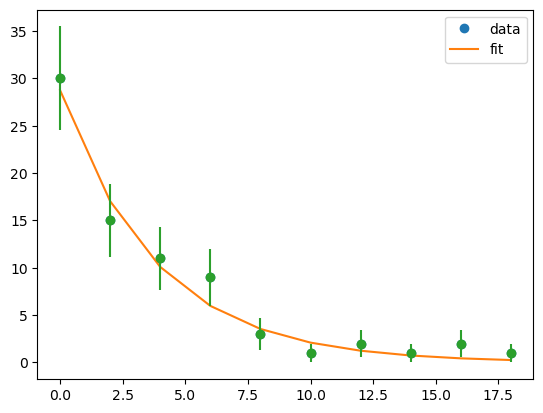

In [6]:
# Finding the best fit parameters
popt, pcov = curve_fit(exponential, time, obs, sigma=uncertainties, absolute_sigma=True)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

# Finding the chi-squared value
expected = exponential(time, *popt)
chi_squared = np.sum(((obs - expected) / uncertainties)**2)
print(chi_squared)

# plotting the data
plt.plot(time, obs, 'o', label='data')
plt.plot(time, expected, label='fit')
plt.errorbar(time, obs, yerr=uncertainties, fmt='o')
plt.legend()
plt.show()

In [10]:
# Fiinding chi squared value
chi_squared = np.sum(((obs - expected) / uncertainties)**2)
print(chi_squared)



# Finding the p-value
dof = len(obs) - len(popt)
p_value = stats.chi2.sf(chi_squared, dof)
print(p_value)

# Finding the reduced chi-squared value
reduced_chi_squared = chi_squared / dof
print(reduced_chi_squared)

# Finding the goodness of fit
goodness_of_fit = stats.chi2.sf(chi_squared, dof)
print(goodness_of_fit)

# Finding the uncertainties for the parameters
perr = np.sqrt(np.diag(pcov))
print(perr)

# Finding the correlation coefficient
corr_coeff = pcov[0,1] / (perr[0] * perr[1])
print(corr_coeff)

# Finding the covariance matrix
cov_matrix = np.cov(obs, expected)
print(cov_matrix)


4.8495613606415136
0.7735275966276474
0.6061951700801892
0.7735275966276474
[4.47256081 0.03562539]
0.6409681659114052
[[87.16666667 85.96725052]
 [85.96725052 86.81751109]]


In [11]:
# Find the relative uncertainty
relative_uncertainty = perr / popt
print(relative_uncertainty)


[0.15555185 0.13604345]


In [8]:
# Doing the fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, time, obs, err = uncertainties, p0 = [30, 0.1])
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

# Plotting the fit
plt.plot(time, obs, 'o', label='data')
plt.plot(time, exponential(time, *popt), label='fit')
plt.legend()
plt.show()

# Plotting the residuals
plt.plot(time, obs - exponential(time, *popt), 'o')
plt.show()



TypeError: leastsq() got an unexpected keyword argument 'err'